In [ ]:
# mount drive to the colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
datasetdir = './drive/MyDrive/Road_Classification_Images/'

In [ ]:
import os
from os import listdir

In [ ]:
listdir(os.path.join(datasetdir, 'train/'))

['clean', 'dirty']

In [ ]:
listdir(os.path.join(datasetdir, 'test/'))

['clean', 'dirty']

In [ ]:
dataset_home = os.path.join(datasetdir)

In [ ]:
new_img_shape = [224, 224, 3]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=45)

In [ ]:
batch_size = 32
train_image_gen = image_gen.flow_from_directory(dataset_home+'/train/',
                                                target_size=new_img_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size=batch_size,
                                                class_mode = 'binary')

Found 217 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(dataset_home+'/test/',
                                                target_size=new_img_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size=batch_size,
                                                class_mode = 'binary',
                                                shuffle=False
                                               )

Found 20 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'clean': 0, 'dirty': 1}

In [ ]:
images, labels = train_image_gen.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[0], images[0].shape

(array([[[0.9607844 , 0.9607844 , 0.9607844 ],
         [0.9607844 , 0.9607844 , 0.9607844 ],
         [0.9912236 , 0.9912236 , 0.9912236 ],
         ...,
         [0.5114621 , 0.56935567, 0.5543976 ],
         [0.5387876 , 0.5976111 , 0.5780033 ],
         [0.5550019 , 0.61382544, 0.5942176 ]],
 
        [[0.9570636 , 0.9570636 , 0.9570636 ],
         [0.9572367 , 0.9572367 , 0.9572367 ],
         [0.984297  , 0.984297  , 0.984297  ],
         ...,
         [0.51120245, 0.5691393 , 0.5539648 ],
         [0.53926367, 0.5980872 , 0.57847935],
         [0.5550885 , 0.61391205, 0.5943042 ]],
 
        [[0.9571874 , 0.9571874 , 0.9571874 ],
         [0.9566248 , 0.9566248 , 0.9566248 ],
         [0.95175266, 0.95175266, 0.95175266],
         ...,
         [0.50599414, 0.56397426, 0.54858345],
         [0.54282683, 0.60165036, 0.5820425 ],
         [0.5367188 , 0.5955423 , 0.57593447]],
 
        ...,
 
        [[0.8808982 , 0.88005435, 0.8851176 ],
         [0.86399364, 0.85922843, 0.88697

In [ ]:
def show_25_images(images, labels):
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    if labels[i]==1:
        plt.title('Dirty')
    else:
        plt.title('Clean')
    plt.axis("off")

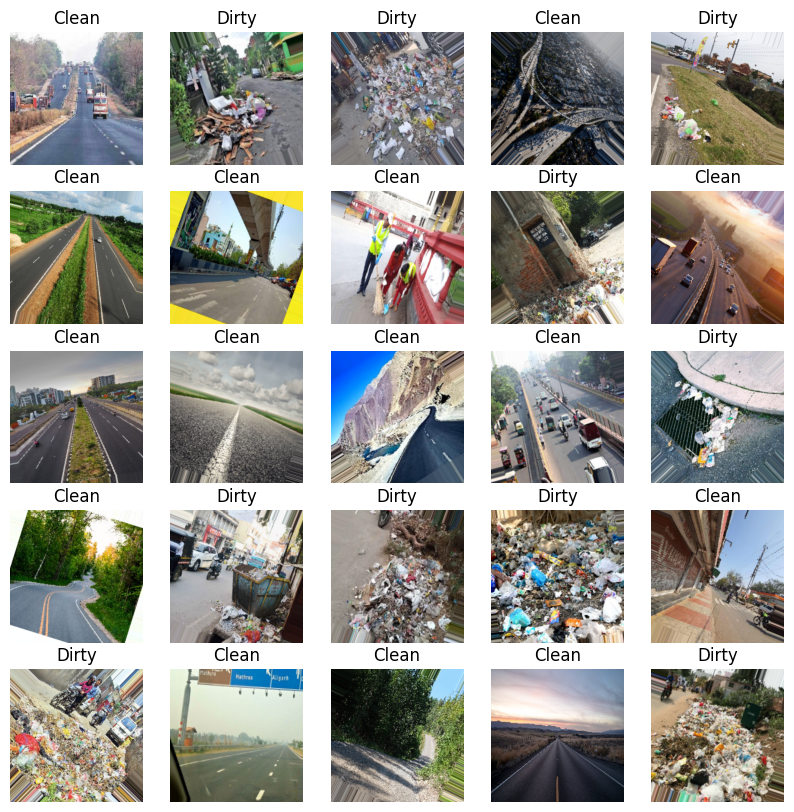

In [ ]:
show_25_images(images, labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
input_shape = (32, 32, 3)

In [ ]:
model = Sequential([
    Conv2D(input_shape = new_img_shape,
           filters = 32,
           kernel_size=(3,3),
           activation='relu',
           padding='same'), # input layer (specify input shape)
    Conv2D(filters = 32,
           kernel_size=(3,3),
           activation='relu',
           padding='same'),
    Conv2D(filters = 32,
           kernel_size=(3,3),
           activation='relu',
           padding='same'),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_21 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 flatten_7 (Flatten)         (None, 1605632)           0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1605633   
                                                                 
Total params: 1625025 (6.20 MB)
Trainable params: 1625025 (6.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model.fit(train_image_gen,
                epochs=10,
                validation_data=test_image_gen,
                callbacks=[early_stop])

Epoch 1/10
7/7 [==============================] - 63s 9s/step - loss: 6.7568 - accuracy: 0.5530 - val_loss: 1.0640 - val_accuracy: 0.5500
Epoch 2/10
7/7 [==============================] - 57s 8s/step - loss: 0.9728 - accuracy: 0.5576 - val_loss: 0.7485 - val_accuracy: 0.5500
Epoch 3/10
7/7 [==============================] - 60s 8s/step - loss: 0.6075 - accuracy: 0.6866 - val_loss: 0.6203 - val_accuracy: 0.6000
Epoch 4/10
7/7 [==============================] - 57s 8s/step - loss: 0.5140 - accuracy: 0.7512 - val_loss: 0.5919 - val_accuracy: 0.6000
Epoch 5/10
7/7 [==============================] - 60s 8s/step - loss: 0.4401 - accuracy: 0.8018 - val_loss: 0.7174 - val_accuracy: 0.6000
Epoch 6/10
7/7 [==============================] - 58s 8s/step - loss: 0.4912 - accuracy: 0.7880 - val_loss: 0.5593 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 60s 8s/step - loss: 0.4361 - accuracy: 0.8157 - val_loss: 0.7048 - val_accuracy: 0.5500
Epoch 8/10
7/7 [==================

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,6.756830,0.552995,1.063997,0.55
1,0.972838,0.557604,0.748521,0.55
2,0.607482,0.686636,0.620285,0.60
3,0.513997,0.751152,0.591935,0.60
4,0.440096,0.801843,0.717397,0.60


<Axes: >

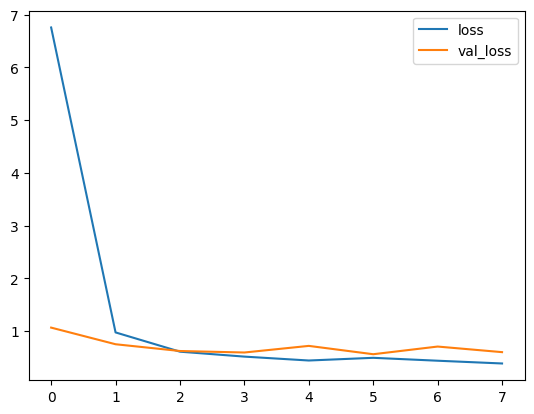

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

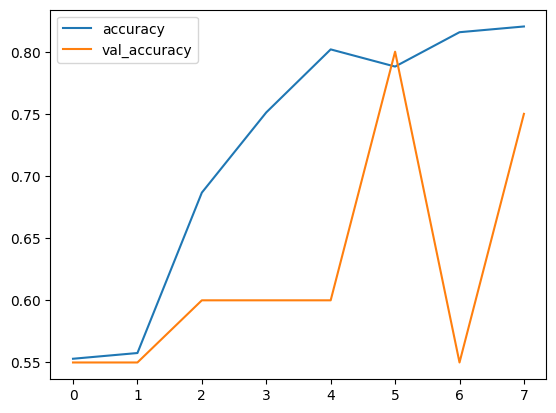

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
prediction = model.predict(test_image_gen)
prediction

1/1 [==============================] - 2s 2s/step


array([[1.8793061e-01],
       [3.1377780e-01],
       [3.0329552e-01],
       [2.1223380e-10],
       [7.4349731e-01],
       [2.3913267e-01],
       [2.2623505e-01],
       [8.8478827e-01],
       [4.6776712e-01],
       [7.8375918e-01],
       [9.5253247e-01],
       [6.7808717e-01],
       [6.5819311e-01],
       [4.7065294e-01],
       [8.7781405e-01],
       [6.0118967e-01],
       [2.1475264e-01],
       [9.1632801e-01],
       [9.2598534e-01],
       [7.4015480e-01]], dtype=float32)

In [ ]:
base_pred = prediction > 0.5
base_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [ ]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('Classification Report: \n', classification_report(base_pred, y_test))

Classification Report: 
               precision    recall  f1-score   support

       False       0.70      0.78      0.74         9
        True       0.80      0.73      0.76        11

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



In [ ]:
print('Confusion Matrix: \n', confusion_matrix(base_pred, y_test))

Confusion Matrix: 
 [[7 2]
 [3 8]]


<Axes: >

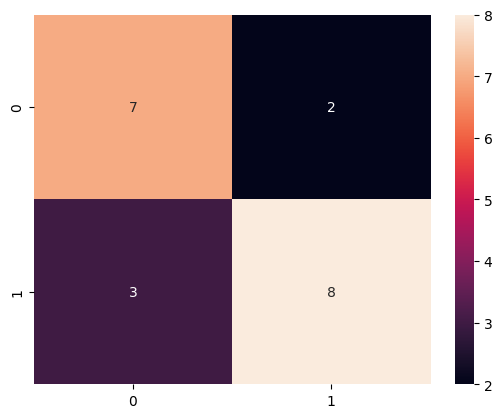

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(base_pred, y_test), annot = True)